In [3]:
!pip install ucimlrepo
!pip install -U scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 393.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/11.0 MB 737.3 kB/s eta 0:00:15
    --------------------------------------- 0.2/11.0 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.0 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.0 MB 2.3 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.0 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.0 MB 4.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.7/11.0 MB 6.4 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 9.5 MB/s eta 0:00:01
   ----------------------- ---------------- 6.5/11.0 MB 12.6 MB/s eta 0:00:01
   ------------

In [50]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
zoo = fetch_ucirepo(id=111) 
  
# data (as pandas dataframes) 
X = zoo.data.features 
y = zoo.data.targets 
  
# metadata 
print(zoo.metadata) 
  
# variable information 
print(zoo.variables) 


{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [51]:
from sklearn.datasets import fetch_openml

# Carga el conjunto de datos 'zoo' desde el repositorio UCI
zoo = fetch_openml(name='zoo', version=1)

# 'data' contiene las características
X = zoo.data

# 'target' contiene las etiquetas
y = zoo.target

# Imprime las primeras 5 filas de las características
print(X[:5])

# Imprime las primeras 5 etiquetas
print(y[:5])



    hair feathers   eggs   milk airborne aquatic predator toothed backbone  \
0   true    false  false   true    false   false     true    true     true   
1   true    false  false   true    false   false    false    true     true   
2  false    false   true  false    false    true     true    true     true   
3   true    false  false   true    false   false     true    true     true   
4   true    false  false   true    false   false     true    true     true   

  breathes venomous   fins  legs   tail domestic catsize  
0     true    false  false     4  false    false    true  
1     true    false  false     4   true    false    true  
2    false    false   true     0   true    false   false  
3     true    false  false     4  false    false    true  
4     true    false  false     4   true    false    true  
0    mammal
1    mammal
2      fish
3    mammal
4    mammal
Name: type, dtype: category
Categories (7, object): ['amphibian', 'bird', 'fish', 'insect', 'invertebrate', 'mammal',

In [52]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Input

# Carga el conjunto de datos 'zoo' desde el repositorio UCI
zoo = fetch_openml(name='zoo', version=1)

# 'data' contiene las características
X = zoo.data

# 'target' contiene las etiquetas
y = zoo.target

In [53]:
# Codifica las etiquetas a valores numéricos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Convertir y a tipo entero
y = y.astype(int)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Crea el modelo de red neuronal
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Capa de entrada
model.add(Dense(10, activation='relu'))  # Capa oculta
model.add(Dense(len(encoder.classes_), activation='softmax'))  # Capa de salida con activación softmax

In [55]:
# Compila el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
from sklearn.preprocessing import LabelEncoder

# Crea el codificador de etiquetas
encoder = LabelEncoder()

# Ajusta y transforma las etiquetas a valores numéricos
y = encoder.fit_transform(y)


In [57]:
import pandas as pd

# Convert your data to a DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Get the shape of your data
print("Shape of X_train:", X_train_df.shape)
print("Shape of y_train:", y_train_df.shape)

# Get more information about your data
print("\nInformation about X_train:")
print(X_train_df.info())
print("\nInformation about y_train:")
print(y_train_df.info())

# Display the first few rows of your data
print("\nFirst few rows of X_train:")
print(X_train_df.head())
print("\nFirst few rows of y_train:")
print(y_train_df.head())


Shape of X_train: (80, 16)
Shape of y_train: (80, 1)

Information about X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 89 to 51
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hair      80 non-null     category
 1   feathers  80 non-null     category
 2   eggs      80 non-null     category
 3   milk      80 non-null     category
 4   airborne  80 non-null     category
 5   aquatic   80 non-null     category
 6   predator  80 non-null     category
 7   toothed   80 non-null     category
 8   backbone  80 non-null     category
 9   breathes  80 non-null     category
 10  venomous  80 non-null     category
 11  fins      80 non-null     category
 12  legs      80 non-null     int64   
 13  tail      80 non-null     category
 14  domestic  80 non-null     category
 15  catsize   80 non-null     category
dtypes: category(15), int64(1)
memory usage: 4.2 KB
None

Information about y_train:
<class 'pandas.

In [58]:
# Convierte los datos booleanos a números enteros
X_train_df = X_train_df.replace({'true': 1, 'false': 0})

# Convierte los datos a float32 para evitar errores de tipo
X_train = np.array(X_train_df).astype('float32')

# Entrena el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0548 - loss: 2.0663  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0577 - loss: 2.0337 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0379 - loss: 1.9626     
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0112 - loss: 1.9004     
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0887 - loss: 1.8346 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1488 - loss: 1.8167 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1866 - loss: 1.7653 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2984 - loss: 1.7434 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3948 - loss: 1.6890 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3978 - loss: 1.6727 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6160 - loss: 1.6242 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 

In [59]:
# Importa las bibliotecas necesarias
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Asumiendo que X_train y y_train son tus datos y etiquetas de entrenamiento preprocesados

# Convierte tus datos a un DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Obtiene la forma de tus datos
print("Forma de X_train:", X_train_df.shape)
print("Forma de y_train:", y_train_df.shape)

# Obtiene más información sobre tus datos
print("\nInformación sobre X_train:")
print(X_train_df.info())
print("\nInformación sobre y_train:")
print(y_train_df.info())

# Muestra las primeras filas de tus datos
print("\nPrimeras filas de X_train:")
print(X_train_df.head())
print("\nPrimeras filas de y_train:")
print(y_train_df.head())

# Si y_train no está codificado en one-hot, codifícalo
if len(y_train_df.shape) == 1 or y_train_df.shape[1] == 1:
    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    y_train = to_categorical(y_train_encoded)

# Crea un modelo de red neuronal de una sola capa
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Capa de entrada
model.add(Dense(y_train.shape[1], activation='softmax'))  # Capa de salida con activación softmax

# Compila el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrena el modelo
model.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=10, verbose=1)


Forma de X_train: (80, 16)
Forma de y_train: (80, 1)

Información sobre X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       80 non-null     float32
 1   1       80 non-null     float32
 2   2       80 non-null     float32
 3   3       80 non-null     float32
 4   4       80 non-null     float32
 5   5       80 non-null     float32
 6   6       80 non-null     float32
 7   7       80 non-null     float32
 8   8       80 non-null     float32
 9   9       80 non-null     float32
 10  10      80 non-null     float32
 11  11      80 non-null     float32
 12  12      80 non-null     float32
 13  13      80 non-null     float32
 14  14      80 non-null     float32
 15  15      80 non-null     float32
dtypes: float32(16)
memory usage: 5.1 KB
None

Información sobre y_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data c

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7639 - loss: 1.0085 
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7796 - loss: 0.9994 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8231 - loss: 0.9233 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7765 - loss: 0.9479
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.9840 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8249 - loss: 0.9059 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7525 - loss: 1.0147 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8127 - loss: 0.8823 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.9439 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.8378 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.8560 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8325 - loss: 0.8166 


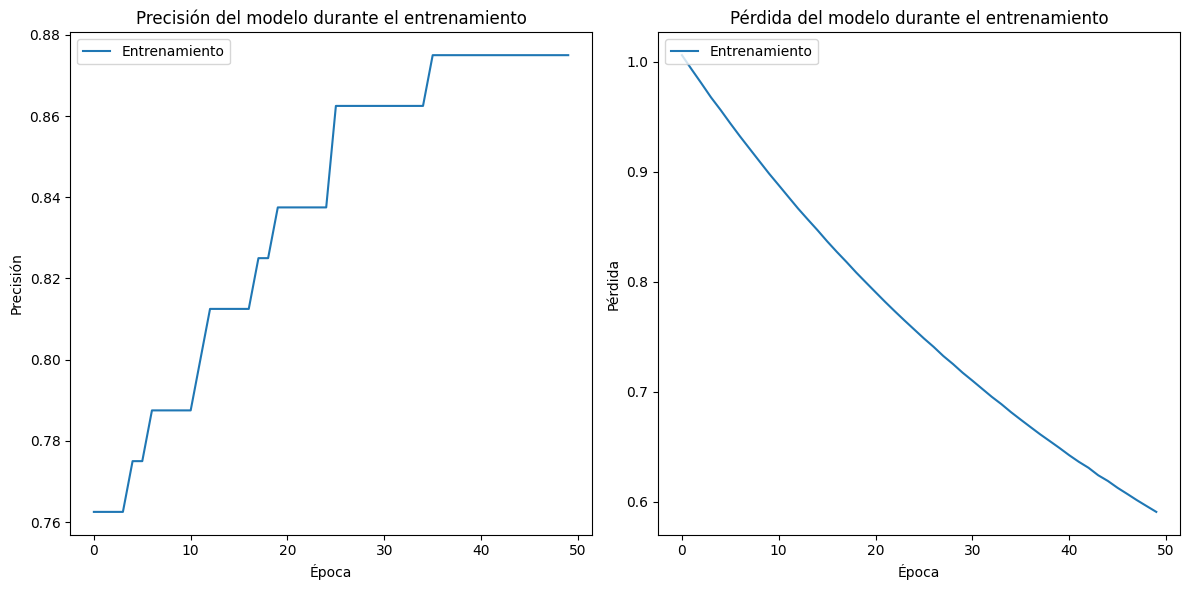

In [60]:
import matplotlib.pyplot as plt

# Entrena el modelo y guarda el historial de entrenamiento
history = model.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=10, verbose=1)

# Grafica la precisión del entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Precisión del modelo durante el entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento'], loc='upper left')

# Grafica la pérdida del entrenamiento
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Pérdida del modelo durante el entrenamiento')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento'], loc='upper left')

plt.tight_layout()
plt.show()
